In [23]:
import warnings
import pickle

import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [24]:
warnings.filterwarnings("ignore")

In [25]:
# loading the dataset

load_path = r"../../files/data/1_end.xlsx"

original_data = pd.read_excel(load_path)
original_data.head()

,year,trade_deficit,covid_dummy,gdp_canada,gdp_us,nominal_exchange_rate,deflator_canada,deflator_usa,cpi_canada,cpi_usa,...,us_econ_policy_uncertainty,m2_us,m2_canada,interest_rate_canada,ppi_canada,ppi_us,interest_rate_us,fdi_us,migration_fear_us,ward_cluster_trend_corrected
0,2003,-712.331648,0,314686.928702,15162760,0.761731,79.575453,77.639,81.538056,185.500,...,90.34359,6067.3,567295,4.729048,80.021339,139.5,0.98,1658275,88.290131,2
1,2004,-851.752241,0,352045.696940,15670880,0.820412,82.280018,79.939,83.276271,191.700,...,66.53288,6418.3,603920,4.320476,83.115497,150.2,2.16,1830644,95.930206,2
2,2005,-953.674088,0,381695.652174,16136734,0.860956,85.601587,82.571,85.014485,198.100,...,70.02676,6681.9,642923,4.041000,85.356095,163.0,4.16,2007151,90.102013,2
3,2006,-888.751877,0,390398.022893,16561866,0.867152,86.896102,84.770,86.436661,203.100,...,51.03904,7071.6,678248,3.966316,88.236863,165.6,5.24,2255955,116.371735,2
4,2007,-781.766393,0,458809.799421,16915191,0.997904,90.129249,86.993,88.490914,211.445,...,116.99090,7471.6,739943,4.015789,87.810083,178.6,4.24,2463600,112.055168,2


In [27]:
data = original_data.drop(['year', 'trade_deficit', 'ward_cluster_trend_corrected', 'covid_dummy'], axis=1)

In [28]:
# Assuming 'data' is your DataFrame
# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Create a PCA object
pca = PCA()

# Fit the PCA instance
pca.fit(data_scaled)

# Transform the data
data_pca = pca.transform(data_scaled)

# Create a DataFrame from the transformed data
data_pca_df = pd.DataFrame(data_pca, columns=[f"PC{i+1}" for i in range(data_pca.shape[1])])

In [29]:
# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
explained_variance_ratio = [round(number, 3) for number in list(explained_variance_ratio)]

explained_variance_ratio_cumsum = pca.explained_variance_ratio_.cumsum()
explained_variance_ratio_cumsum = [round(number, 3) for number in list(explained_variance_ratio_cumsum)]

print("Explained Variance Ratio:", explained_variance_ratio)
print("Cumulative Explained Variance Ratio:", explained_variance_ratio_cumsum)

Explained Variance Ratio: [0.66, 0.18, 0.077, 0.032, 0.028, 0.012, 0.005, 0.003, 0.002, 0.001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Cumulative Explained Variance Ratio: [0.66, 0.84, 0.917, 0.949, 0.977, 0.989, 0.994, 0.996, 0.999, 0.999, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


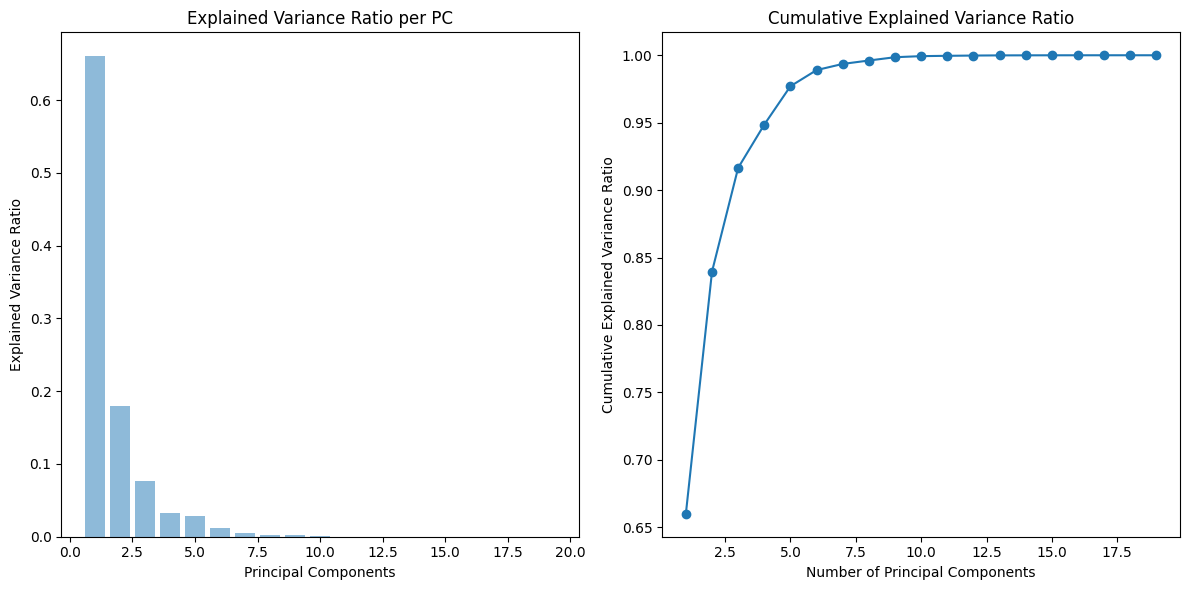

In [30]:
# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance_ratio = explained_variance_ratio.cumsum()

# Plotting
plt.figure(figsize=(12, 6))

# Explained Variance Ratio
plt.subplot(1, 2, 1)
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.5, align='center')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio per PC')

# Cumulative Explained Variance Ratio
plt.subplot(1, 2, 2)
plt.plot(range(1, len(cumulative_explained_variance_ratio) + 1), cumulative_explained_variance_ratio, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance Ratio')

plt.tight_layout()
plt.show()

In [31]:
dim_reduced_data = data_pca_df.iloc[:, :8]
dim_reduced_data['year'] = original_data['year']
dim_reduced_data['trade_deficit'] = original_data['trade_deficit']

In [33]:
save_path = r"../../files/data/2_end.xlsx"
dim_reduced_data.to_excel(save_path, index=False)

In [8]:
PCA_model = r"../files/models/PCA.pkl"
scaler_model = r"../files/models/scaler.pkl"

with open(PCA_model, 'wb') as f:
    pickle.dump(pca, f)

with open(scaler_model, 'wb') as f:
    pickle.dump(scaler, f)